# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [14]:
import sys
!{sys.executable} -m pip install wbdata

In [15]:
!pip install wbdata
import wbdata
import pandas as pd

In [16]:
indicadores = {"NY.GDP.MKTP.CD": "Producto Interno Bruto (PIB) en millones USD", "NY.GDP.MKTP.KD.ZG": "Tasa de Crecimiento del PIB (%)"}
#NY.GDP.MKTP.CD:       Producto Interno Bruto (PIB) en USD
#NY.GDP.MKTP.KD.ZG:    Tasa de Crecimiento del PIB (%)

data = wbdata.get_dataframe(indicadores, country=['AR','UY'], date=("2010","2023"))

df = pd.DataFrame(data=data)
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"]/1000000
df["Producto Interno Bruto (PIB) en millones USD"]=df[ "Producto Interno Bruto (PIB) en millones USD"].apply(round)
df[ "Tasa de Crecimiento del PIB (%)"]=df[ "Tasa de Crecimiento del PIB (%)"].apply(lambda x: round(x, 2))
df.to_excel('data.xlsx')
df

Producto Interno Bruto (PIB) en millones USD  \
country   date                                                 
Argentina 2023                                        646075   
          2022                                        632790   
          2021                                        486564   
          2020                                        385741   
          2019                                        447755   
          2018                                        524820   
          2017                                        643628   
          2016                                        557532   
          2015                                        594749   
          2014                                        526320   
          2013                                        552025   
          2012                                        545982   
          2011                                        530158   
          2010                                        423627   
Uruguay   2023                                         77241   
          2022                                         70165   
          2021                                         60761   
          2020                                         53669   
          2019                                         62222   
          2018                                         65345   
          2017                                         65006   
          2016                                         57481   
          2015                                         57680   
          2014                                         61496   
          2013                                         61338   
          2012                                         54232   
          2011                                         50342   
          2010                                         41950   

                Tasa de Crecimiento del PIB (%)  
country   date                                   
Argentina 2023                            -1.61  
          2022                             5.27  
          2021                            10.44  
          2020                            -9.90  
          2019                            -2.00  
          2018                            -2.62  
          2017                             2.82  
          2016                            -2.08  
          2015                             2.73  
          2014                            -2.51  
          2013                             2.41  
          2012                            -1.03  
          2011                             6.00  
          2010                            10.13  
Uruguay   2023                             0.37  
          2022                             4.71  
          2021                             5.56  
          2020                            -7.38  
          2019                             0.93  
          2018                             0.16  
          2017                             1.74  
          2016                             1.69  
          2015                             0.37  
          2014                             3.24  
          2013                             4.64  
          2012                             3.54  
          2011                             5.16  
          2010                             7.80

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [17]:
# Resolver acá
import wbdata
import statistics as st
import pandas as pd
#Se conforma un dataset para cada indicador y se define otro nuevo con la información de la estadística descriptiva del dataset original

#Argentina Variación PIB
indicadores = {("NY.GDP.MKTP.CD"): "Producto Interno Bruto (PIB) en millones USD", "NY.GDP.MKTP.KD.ZG": "Tasa de Crecimiento del PIB (%)"}
data = wbdata.get_dataframe(indicadores, country=['AR'], date=("2010","2023"))
df = pd.DataFrame(data=data)
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"]/1000000
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"].apply(round)
df[ "Tasa de Crecimiento del PIB (%)"]=df[ "Tasa de Crecimiento del PIB (%)"].apply(lambda x: round(x, 2))
df_2 = pd.DataFrame({'prueba': df['Tasa de Crecimiento del PIB (%)'].describe()})
df_2 = df_2.reset_index()

#Uruguay Variación PIB
indicadores = {("NY.GDP.MKTP.CD"): "Producto Interno Bruto (PIB) en millones USD", "NY.GDP.MKTP.KD.ZG": "Tasa de Crecimiento del PIB (%)"}
data = wbdata.get_dataframe(indicadores, country=['URY'], date=("2010","2023"))
df = pd.DataFrame(data=data)
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"]/1000000
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"].apply(round)
df[ "Tasa de Crecimiento del PIB (%)"]=df[ "Tasa de Crecimiento del PIB (%)"].apply(lambda x: round(x, 2))
df_4 = pd.DataFrame({'prueba': df['Tasa de Crecimiento del PIB (%)'].describe()})
df_4 = df_4.reset_index()

#Argentina PIB en USD
indicadores = {("NY.GDP.MKTP.CD"): "Producto Interno Bruto (PIB) en millones USD", "NY.GDP.MKTP.KD.ZG": "Tasa de Crecimiento del PIB (%)"}
data = wbdata.get_dataframe(indicadores, country=['AR'], date=("2010","2023"))
df = pd.DataFrame(data=data)
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"]/1000000
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"].apply(round)
df[ "Tasa de Crecimiento del PIB (%)"]=df[ "Tasa de Crecimiento del PIB (%)"].apply(lambda x: round(x, 2))
df_1 = pd.DataFrame({'prueba': df["Producto Interno Bruto (PIB) en millones USD"].describe()})
df_1 = df_1.reset_index()

#Uruguay PIB en USD
indicadores = {("NY.GDP.MKTP.CD"): "Producto Interno Bruto (PIB) en millones USD", "NY.GDP.MKTP.KD.ZG": "Tasa de Crecimiento del PIB (%)"}
data = wbdata.get_dataframe(indicadores, country=['URY'], date=("2010","2023"))
df = pd.DataFrame(data=data)
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"]/1000000
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"].apply(round)
df[ "Tasa de Crecimiento del PIB (%)"]=df[ "Tasa de Crecimiento del PIB (%)"].apply(lambda x: round(x, 2))
df_5 = pd.DataFrame({'prueba': df["Producto Interno Bruto (PIB) en millones USD"].describe()})
df_5 = df_5.reset_index()

#df2: Estadística Descriptiva Argentina Variación PIB(%), df4: Estadística Descriptiva Uruguay Variación PIB(%)
#df1:Estadística Descriptiva Argentina PIB en Millones, df5: Estadística Descriptiva Uruguay Variación PIB en Millones

descripcion=({
    "Media Aritmética Variación(%)":[df_2.iloc[1]["prueba"],
                        df_4.iloc[1]["prueba"]],
    "Desvío Estándar Variación(%)":[df_2.iloc[2]["prueba"],
                       df_4.iloc[2]["prueba"]],
    "Mín Variación(%)":[df_2.iloc[3]["prueba"],
              df_4.iloc[3]["prueba"]],
    "Máx Variación(%)":[df_2.iloc[7]["prueba"],
              df_4.iloc[7]["prueba"]],
    "25% Variación(%)":[df_2.iloc[4]["prueba"],
           df_4.iloc[4]["prueba"]] ,
    "Mediana Variación(%)":[df_2.iloc[5]["prueba"],df_4.iloc[5]["prueba"]],
    "75% Variación(%)":[df_2.iloc[6]["prueba"],df_4.iloc[6]["prueba"]],
    "Media Aritmética PIB Millones":[df_1.iloc[1]["prueba"],df_5.iloc[1]["prueba"]],
    "Desvío Estándar PIB Millones":[df_1.iloc[2]["prueba"],df_5.iloc[2]["prueba"]], 
    "Min PIB Millones":[df_1.iloc[3]["prueba"],df_5.iloc[3]["prueba"]], 
    "Máx PIB Millones":[df_1.iloc[7]["prueba"],df_5.iloc[7]["prueba"]], 
    "25% PIB Millones":[df_1.iloc[4]["prueba"],df_5.iloc[4]["prueba"]],
    "Mediana PIB Millones":[df_1.iloc[5]["prueba"],df_5.iloc[5]["prueba"]],
    "75% PIB Millones":[df_1.iloc[6]["prueba"],df_5.iloc[6]["prueba"]]})

df_3=pd.DataFrame(descripcion)
df_3[ "Media Aritmética Variación(%)"]=df_3[ "Media Aritmética Variación(%)"].apply(lambda x: round(x,2))
df_3[ "Media Aritmética PIB Millones"]=df_3[ "Media Aritmética PIB Millones"].apply(lambda x: round(x, 2))
df_3[ "Desvío Estándar Variación(%)"]=df_3[ "Desvío Estándar Variación(%)"].apply(lambda x: round(x, 2))
df_3[ "Mín Variación(%)"]=df_3[ "Mín Variación(%)"].apply(lambda x: round(x, 2))
df_3[ "Min PIB Millones"]=df_3[ "Min PIB Millones"].apply(lambda x: round(x, 2))
df_3[ "Máx PIB Millones"]=df_3[ "Máx PIB Millones"].apply(lambda x: round(x, 2))
df_3[ "25% PIB Millones"]=df_3[ "25% PIB Millones"].apply(lambda x: round(x, 2))
df_3[ "75% PIB Millones"]=df_3[ "75% PIB Millones"].apply(lambda x: round(x, 2))
df_3[ "Desvío Estándar PIB Millones"]=df_3[ "Desvío Estándar PIB Millones"].apply(lambda x: round(x, 2))
index_=["Argentina", "Uruguay"]
df_3.index=index_
df_3

,Media Aritmética Variación(%),Desvío Estándar Variación(%),Mín Variación(%),Máx Variación(%),25% Variación(%),Mediana Variación(%),75% Variación(%),Media Aritmética PIB Millones,Desvío Estándar PIB Millones,Min PIB Millones,Máx PIB Millones,25% PIB Millones,Mediana PIB Millones,75% PIB Millones
Argentina,1.29,5.52,-9.90,10.44,-2.06,0.69,4.6575,535554.71,79916.65,385741.0,646075.0,496128.00,538070.0,585444.75
Uruguay,2.32,3.63,-7.38,7.80,0.51,2.49,4.6925,59923.43,8628.35,41950.0,77241.0,55044.25,61049.5,64310.00


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [18]:
import matplotlib.pyplot as plt

In [19]:
import os
os.chdir('C:\\Users\\ldtes')

In [25]:
df = pd.read_excel('data.xlsx')

## Tomamos los datos referidos al PBI y la tasa de Crec de Arg y Uru.
df_arg = df[df['country'] == 'Argentina']
df_uy = df[df['country'] == 'Uruguay']

y1 = df_arg[df_arg['country'] == 'Argentina']['Producto Interno Bruto (PIB) en millones USD']
x1 = df_arg[df_arg['country'] == 'Argentina']['date']

y2 = df_arg[df_arg['country'] == 'Argentina']['Tasa de Crecimiento del PIB (%)']
x2 = df_arg[df_arg['country'] == 'Argentina']['date']

y3 = df_uy[df_uy['country'] == 'Uruguay']['Producto Interno Bruto (PIB) en millones USD']
x3 = df_uy[df_uy['country'] == 'Uruguay']['date']

y4 = df_uy[df_uy['country'] == 'Uruguay']['Tasa de Crecimiento del PIB (%)']
x4 = df_uy[df_uy['country'] == 'Uruguay']['date']

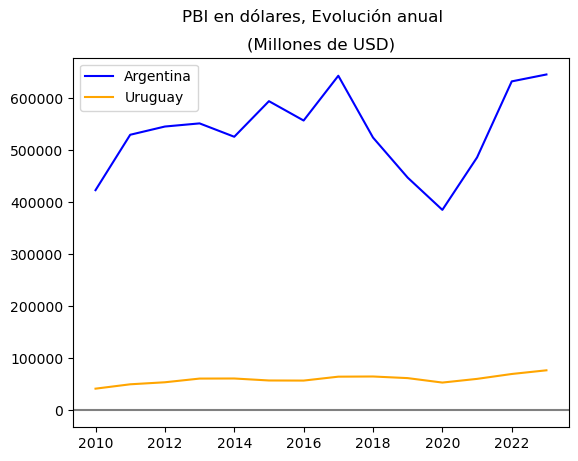

In [37]:
# Realizamos dos gráficos en estilo pyplot.
plt.plot(x1, y1, label="Argentina", color='blue')
plt.plot(x3, y3, label="Uruguay", color='orange')
plt.axhline(y=0, color='grey')

plt.title("(Millones de USD)")
plt.suptitle("PBI en dólares, Evolución anual")

plt.legend(loc='upper left')
plt.savefig('GráficoPBI.png', format='png')
plt.show()

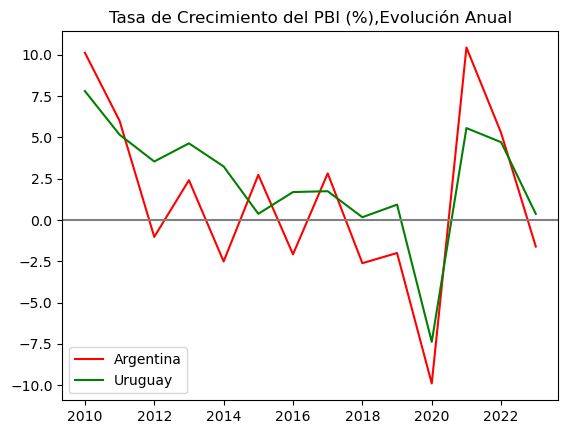

In [38]:
plt.plot(x2, y2, label="Argentina", color='red')
plt.plot(x4, y4, label="Uruguay", color='green')
plt.axhline(y=0, color='grey')

plt.title("Tasa de Crecimiento del PBI (%),Evolución Anual")

plt.legend(loc='lower left')
plt.savefig('grafico_tasa.png', format='png')
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_117440\2699983665.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_117440\2699983665.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


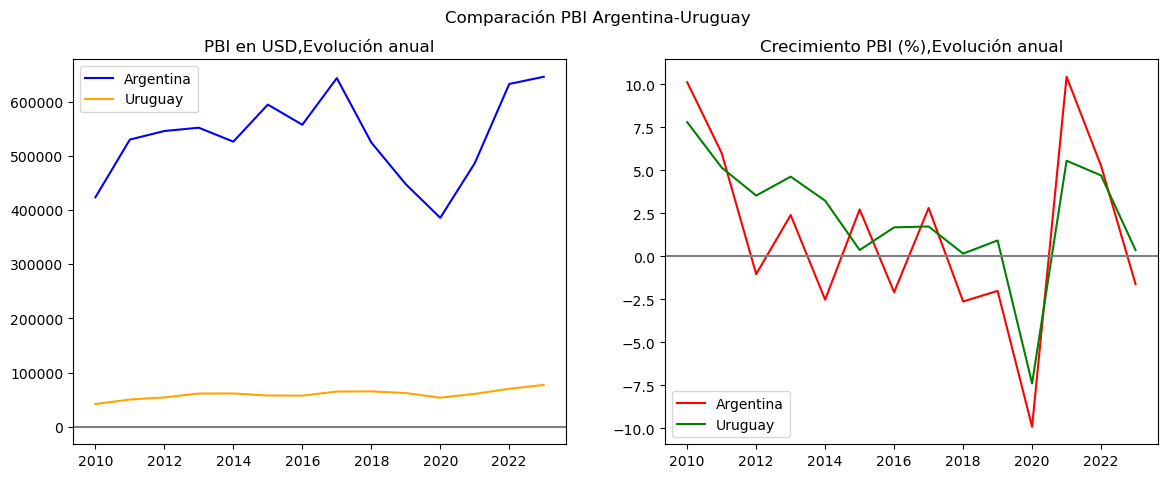

In [36]:
## Realizamos el gráfico en estilo orientado a objetos.
fig, ax = plt.subplots(figsize=(14, 5), ncols=2, nrows=1)

ax[0].plot(x1, y1, label="Argentina", color='blue')
ax[0].plot(x3, y3, label="Uruguay", color='orange')
ax[0].axhline(y=0, color='grey')

ax[1].plot(x2, y2, label="Argentina", color='red')
ax[1].plot(x4, y4, label="Uruguay", color='green')
ax[1].axhline(y=0, color='grey')

ax[1].set_title("Crecimiento PBI (%),Evolución anual")
ax[0].set_title("PBI en USD,Evolución anual")

fig.suptitle("Comparación PBI Argentina-Uruguay")

ax[0].legend()
fig.show()

ax[1].legend()
fig.show()
fig.savefig('GráficoOrien-Obj.png', format='png')

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [24]:
# Resolver acá
import requests
from bs4 import BeautifulSoup
from openpyxl import Workbook
from openpyxl.styles import Font

# URL de la página de la portada de La Nación
url = "https://www.lanacion.com.ar/"

# Hacer una solicitud a la página
response = requests.get(url)

if response.status_code == 200:
    # Parsear el contenido HTML
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extraer enlaces en el orden en el que aparecen
    links = []
    for a in soup.find_all('a', href=True):
        href = a['href']
        # Ajustar enlaces relativos para incluir el dominio base
        full_link = href if href.startswith("http") else f"{url.rstrip('/')}{href}"
        if full_link not in links:  # Evitar duplicados mientras mantenemos el orden
            links.append(full_link)

    # Crear un archivo Excel con hipervínculos
    wb = Workbook()
    ws = wb.active
    ws.title = "Portada La Nación"
    
    # Insertar hipervínculos en Excel
    for i, link in enumerate(links, start=1):
        ws.cell(row=i, column=1, value=link)  # Texto visible del hipervínculo
        ws.cell(row=i, column=1).hyperlink = link  # Enlace clickeable
        ws.cell(row=i, column=1).font = Font(color="0000FF", underline="single")  # Estilo del enlace

    # Guardar el archivo
    wb.save("Noticias_Portada_La_Nacion.xlsx")
    print("¡Archivo Excel con las noticias en el orden de la portada generado: 'Noticias_Portada_La_Nacion.xlsx'!")
else:
    print(f"Error al acceder a la página: {response.status_code}")

¡Archivo Excel con las noticias en el orden de la portada generado: 'Noticias_Portada_La_Nacion.xlsx'!
